# <span style="color:darkblue"> Kaggle #1 </span>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random # LET'S GOOOO

#### Functions for feature visualisation

In [2]:
def num_compare(df, feature, forCol, binwidth, ax=None, xlim=None, ylim=None, multiple='layer'):
    copied = df.copy()
    copied[feature].fillna(value=copied[feature].mean(), inplace=True)
    copied[feature] = copied[feature].astype('float64')
    sns.histplot(ax=ax, data=copied, x=feature, hue=forCol, binwidth=binwidth, shrink=.8, multiple=multiple)
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

In [3]:
def cat_compare(df, feature, forCol, ylim=None, ax=None, multiple='fill'):
    copied = df.copy()
    copied[feature] = copied[feature].astype('string')
    values = copied[feature].value_counts().index
    counts = copied[feature].value_counts().values
    sns.histplot(data=copied, x=feature, hue=forCol, binwidth=2, multiple=multiple, shrink=.9, palette="YlOrBr", ax=ax)
    
    if ylim:
        plt.ylim(ylim)

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
missing = data.isnull()
for col in data.columns:
    print(f'{col}:\n\t{8693 - missing[col].value_counts()[0]} missing values')
    print('-----------------')

PassengerId:
	0 missing values
-----------------
HomePlanet:
	201 missing values
-----------------
CryoSleep:
	217 missing values
-----------------
Cabin:
	199 missing values
-----------------
Destination:
	182 missing values
-----------------
Age:
	179 missing values
-----------------
VIP:
	203 missing values
-----------------
RoomService:
	181 missing values
-----------------
FoodCourt:
	183 missing values
-----------------
ShoppingMall:
	208 missing values
-----------------
Spa:
	183 missing values
-----------------
VRDeck:
	188 missing values
-----------------
Name:
	200 missing values
-----------------
Transported:
	0 missing values
-----------------


#### Splitting Cabin feature

In [8]:
data[['Deck', 'CabNum', 'Side']] = data.Cabin.str.split('/', expand=True)[[0, 1, 2]]

#### Creating TotalSpent feature

In [9]:
data['TotalSpent'] = data.RoomService + data.FoodCourt + data.ShoppingMall + data.Spa + data.VRDeck 

In [10]:
target = 'Transported'
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']

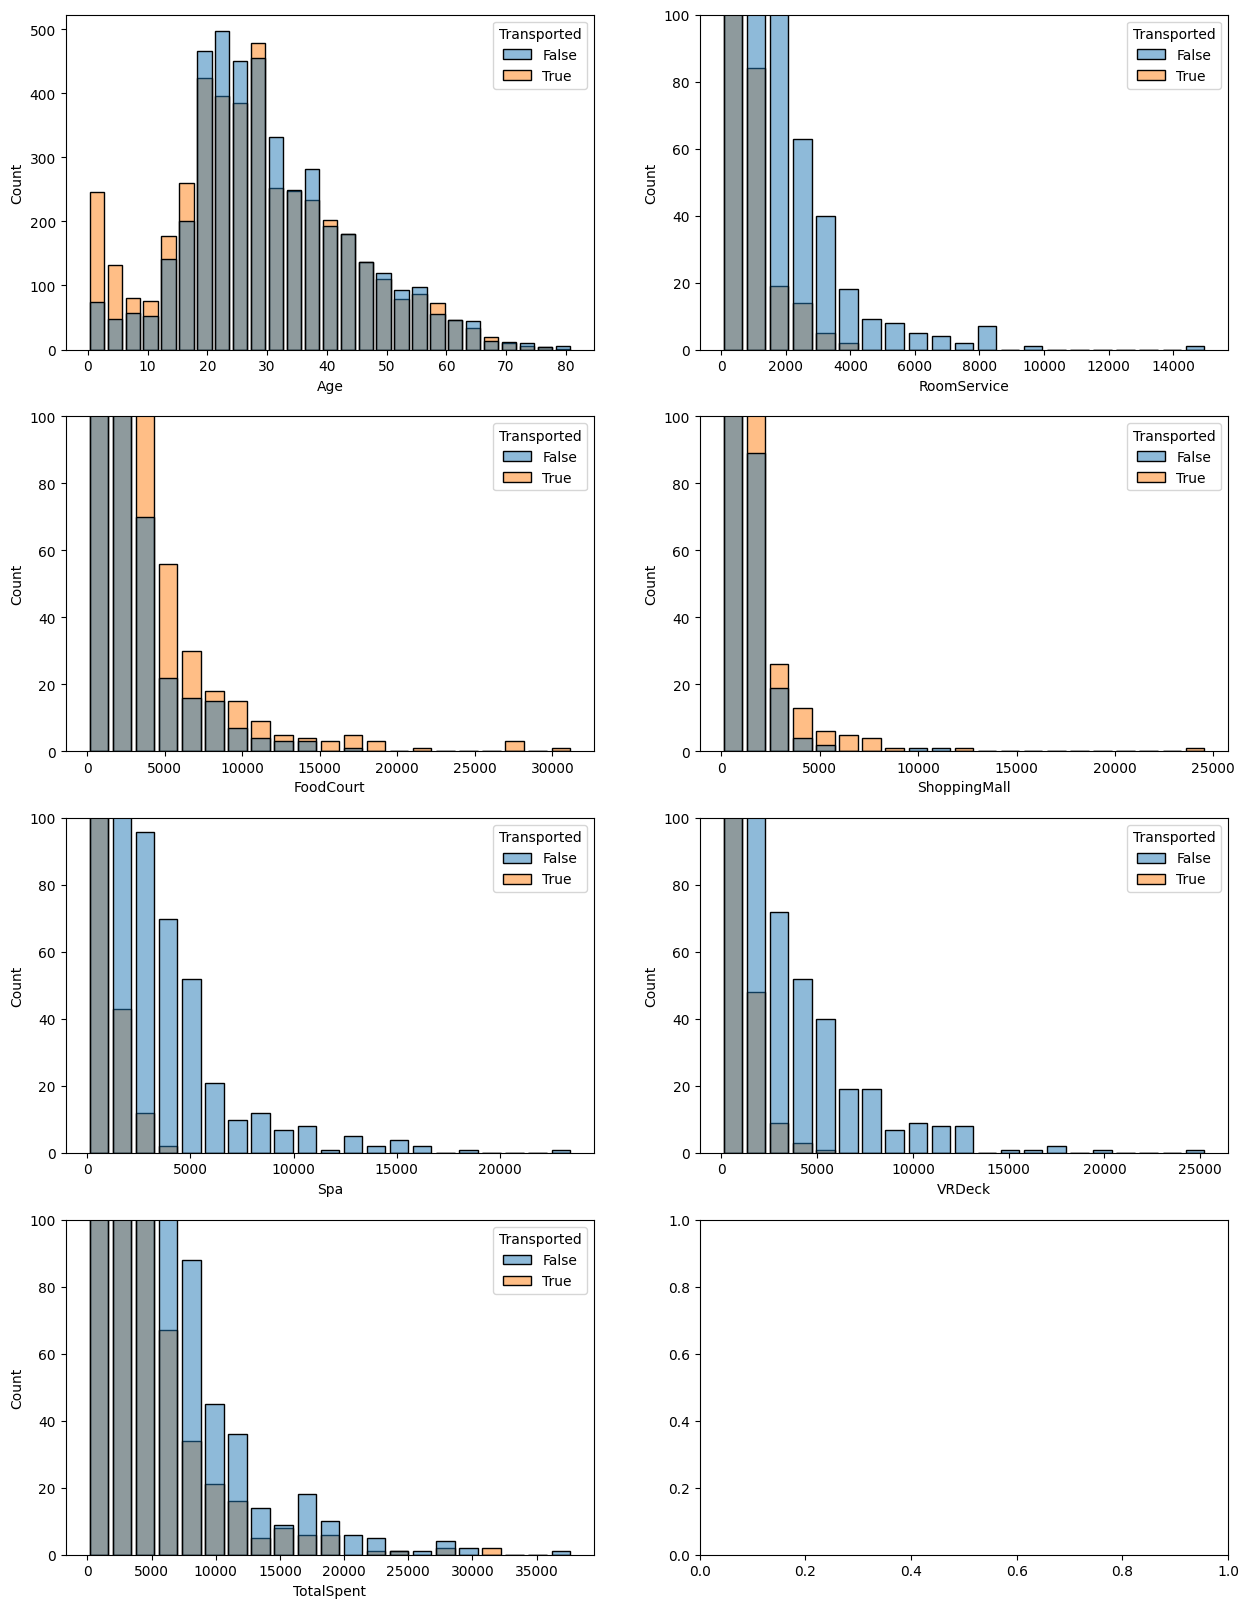

In [11]:
fig, axis = plt.subplots(len(num_cols) // 2 + len(num_cols) % 2, 2)
fig.set_figwidth(15)
fig.set_figheight(20)

for feature, ax in zip(num_cols, axis.flatten()):
    num_compare(data, feature=feature,
                forCol=target,
                binwidth=data[feature].max() // 20,
                ax=ax)
    if feature != 'Age':
        ax.set_ylim(0, data[feature].value_counts().min() * 100)

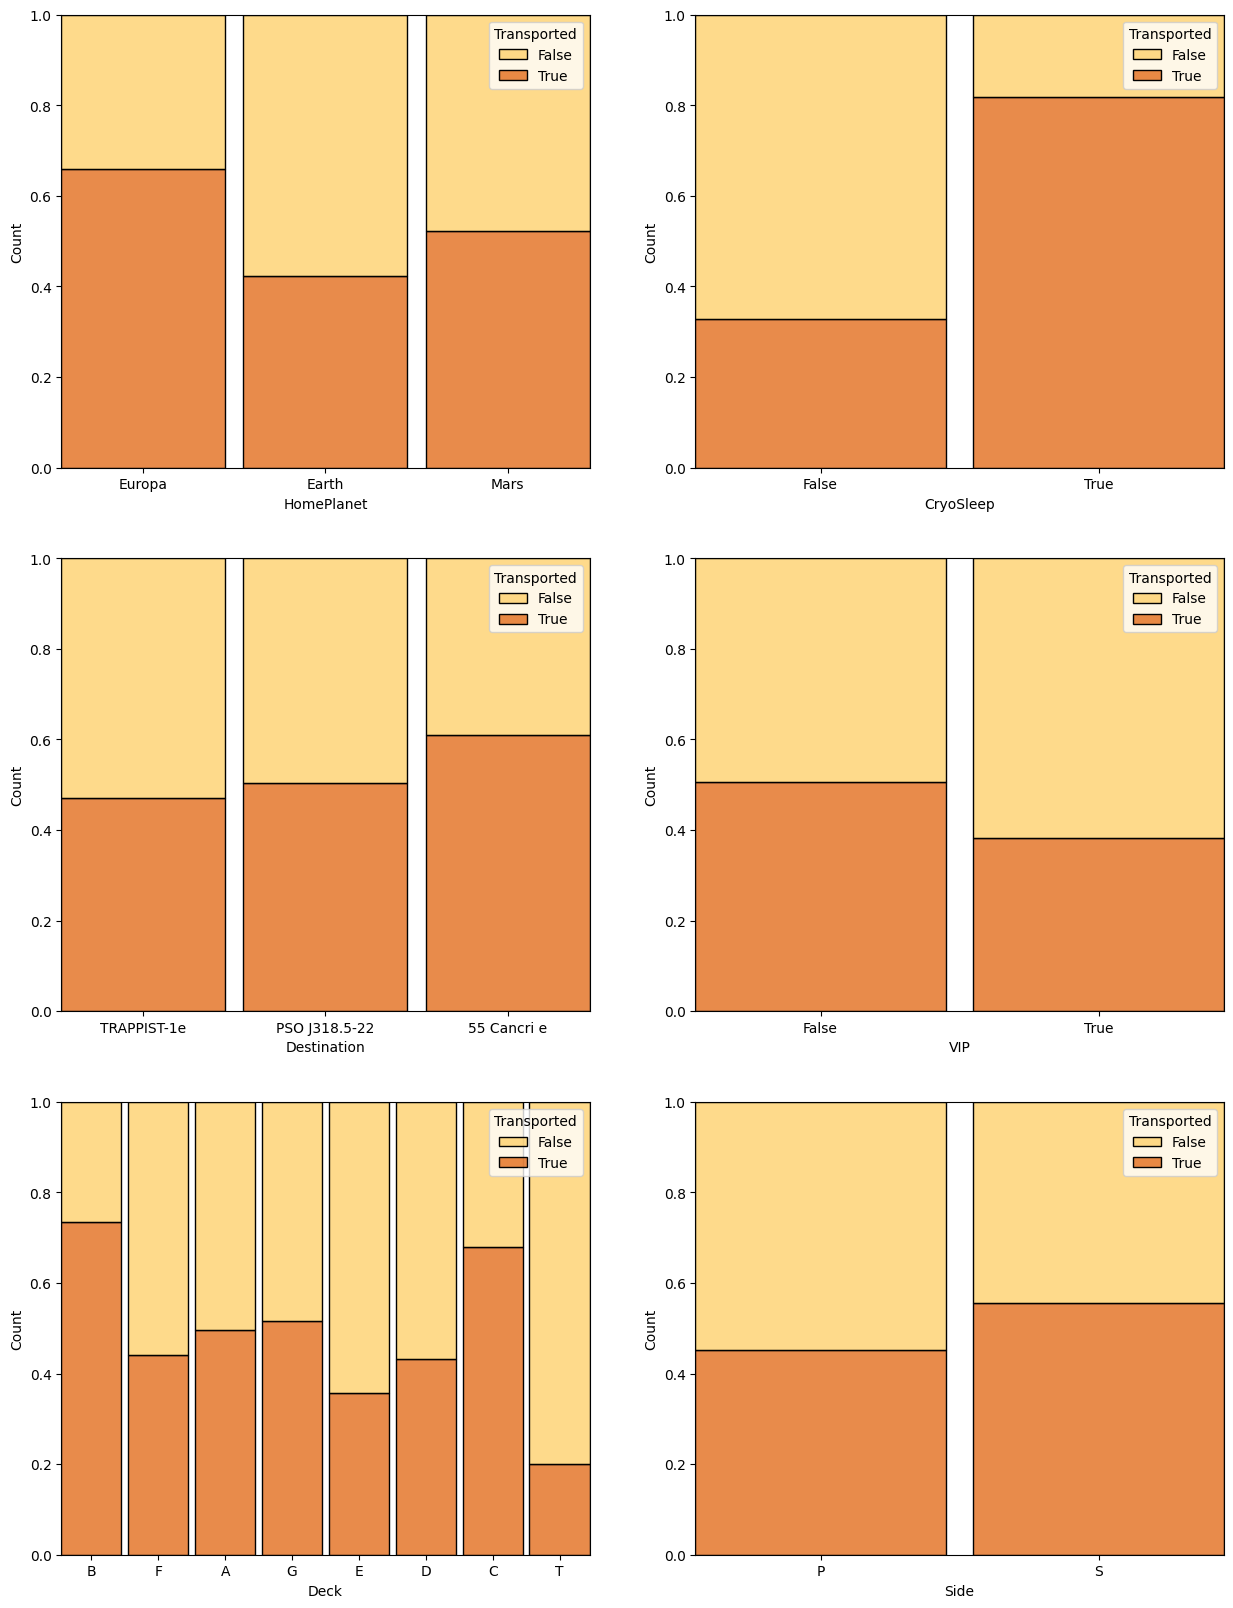

In [12]:
fig, axis = plt.subplots(len(cat_cols) // 2 + len(cat_cols) % 2, 2)
fig.set_figwidth(15)
fig.set_figheight(20)

for feature, ax in zip(cat_cols, axis.flatten()):
    cat_compare(data, feature=feature, forCol=target, ax=ax)

#### Splitting passengers by groups and checking wether having a VIP in group reduces your chances to be transported

In [13]:
data[['Group', 'NinGroup']] = data.PassengerId.str.split('_', expand=True)[[0, 1]]

In [14]:
data['GroupSize'] = data.groupby(by='Group')['Group'].transform('count')

In [15]:
data['VIPinGroup'] = data.groupby(['Group'])['VIP'].transform(lambda x: True if x.sum() > 0 else False)

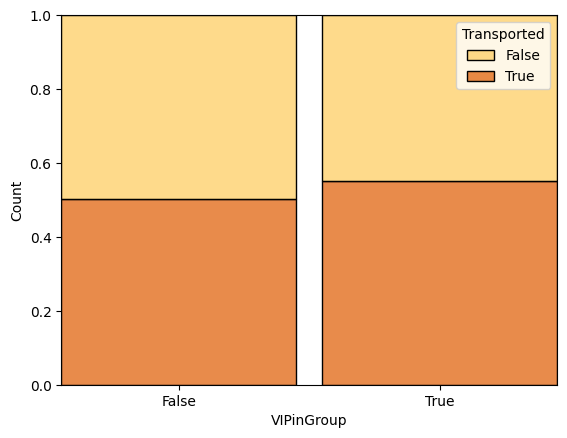

In [16]:
cat_compare(data, feature='VIPinGroup', forCol=target)

<span style="color:darkred"> Conclusion: </span>
    
    -> No strong correlation  

## <span style="color:green"> Comparing features to find out some laws to fill missing </span>

### <span style="color:blue"> Planets </span>

#### Relation between Deck/Side and HomePlanet

In [17]:
PlanetByDeck = pd.pivot_table(data, index='Deck', columns='HomePlanet', values='PassengerId', aggfunc=len)
PlanetByDeck

HomePlanet,Earth,Europa,Mars
Deck,,,
A,NaN,252.0,NaN
B,NaN,766.0,NaN
C,NaN,734.0,NaN
D,NaN,186.0,282.0
E,395.0,128.0,330.0
F,1614.0,NaN,1110.0
G,2498.0,NaN,NaN
T,NaN,4.0,NaN


In [18]:
PlanetBySide = pd.pivot_table(data, index='Side', columns='HomePlanet', values='PassengerId', aggfunc=len)
PlanetBySide

HomePlanet,Earth,Europa,Mars
Side,,,
P,2270,955,888
S,2237,1115,834


<span style="color:darkred"> Conclusion: </span>
    
    -> People, traveling in A, B, C, D, T decks are from Europa
    
    -> People traveling in G deck are from Earth
    
    -> No strong correlation between HomePlanet and Side

#### Relation between Group/Surname and HomePlanet/Destination

In [19]:
data.dropna(subset=['HomePlanet']).groupby(['Group'])['HomePlanet'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True    6107
Name: HomePlanet, dtype: int64

In [20]:
data.dropna(subset=['Destination']).groupby(['Group'])['Destination'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True     5397
False     717
Name: Destination, dtype: int64

In [21]:
data['Surname'] = data.Name.str.split(' ',expand=True)[1]

In [22]:
data.dropna(subset=['HomePlanet']).groupby(['Surname'])['HomePlanet'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True    2209
Name: HomePlanet, dtype: int64

In [23]:
data.dropna(subset=['Destination']).groupby(['Surname'])['Destination'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

False    1215
True      994
Name: Destination, dtype: int64

<span style="color:darkred"> Conclusion: </span>
    
    -> Groupmates are from same planets but do not have same destinations
    
    -> Families are from same planets but do not have same destinations

### <span style="color:blue"> CryoSleep </span>

#### Relation between CryoSleep and TotalSpent

In [24]:
data[(data.CryoSleep == True) & (data.TotalSpent > 0)].shape

(0, 23)

<span style="color:darkred"> Conclusion: </span>
    
    -> Sleeping people do not spend money :)
    

#### Relation between CryoSleep and Age/VIP

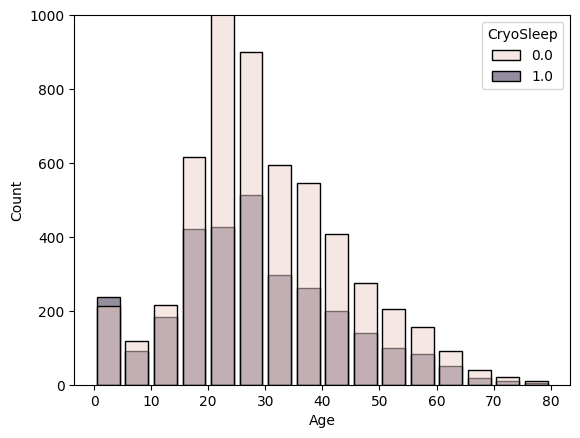

In [25]:
num_compare(data, feature='Age', forCol='CryoSleep', binwidth=5, ylim=[0, 1000])

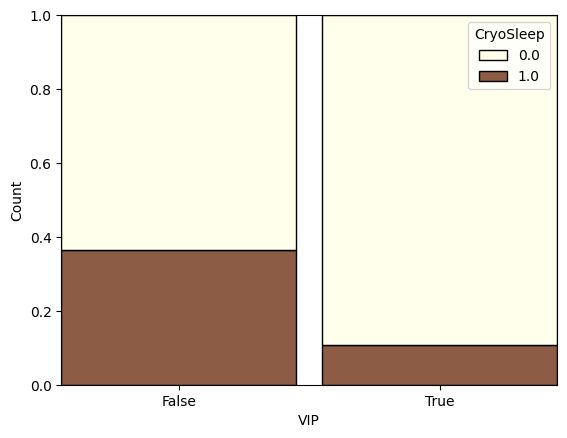

In [26]:
cat_compare(data, feature='VIP', forCol='CryoSleep')

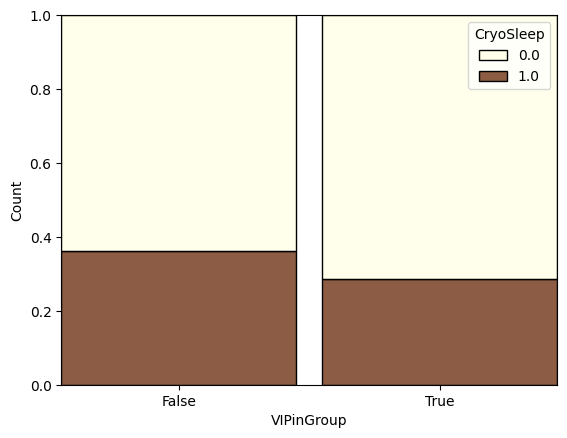

In [27]:
cat_compare(data, feature='VIPinGroup', forCol='CryoSleep')

<span style="color:darkred"> Conclusion: </span>
    
    -> Slight correlation with Age: people under 15 y.o. and above 70 y.o. have more chances to have a Cryo nap :)
    
    -> VIP's don't like sleeping

#### Relation between CryoSleep and HomePlanet/Destination/Route

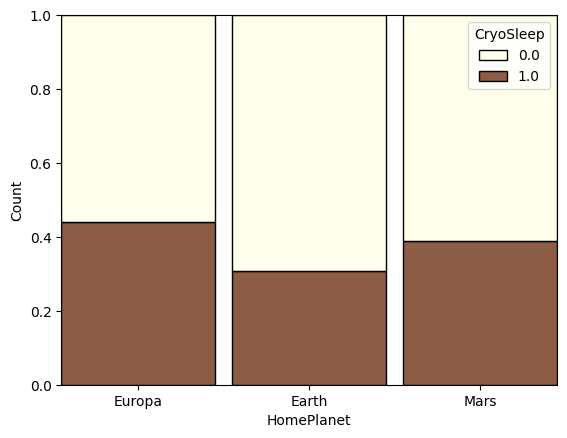

In [28]:
cat_compare(data, feature='HomePlanet', forCol='CryoSleep')

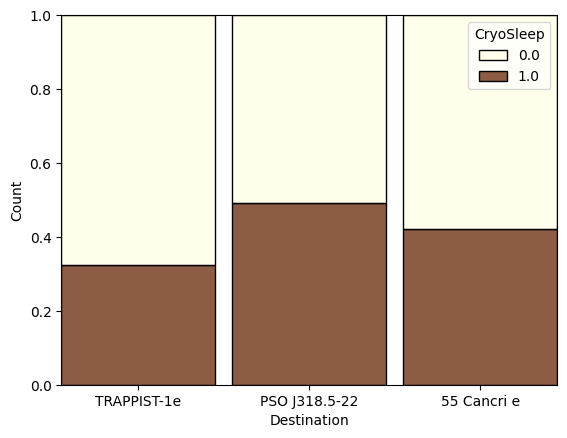

In [29]:
cat_compare(data, feature='Destination', forCol='CryoSleep')

In [30]:
data['Route'] = data.HomePlanet.dropna().str.slice(start=0, stop=2).astype('string') + '-' + data.Destination.dropna().str.slice(start=0, stop=2).astype('string')

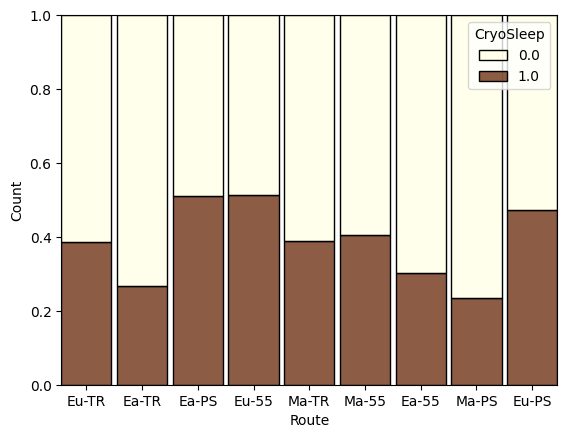

In [31]:
cat_compare(data, feature='Route', forCol='CryoSleep', ylim=[0, 1])

<span style="color:darkred"> Conclusion: </span>
    
    -> Seems like people flying 'Ma-PS', 'Ea-TR' and 'Ea-55' are less likely to have a Cryo nap

#### Relation between CryoSleep and Deck/Side

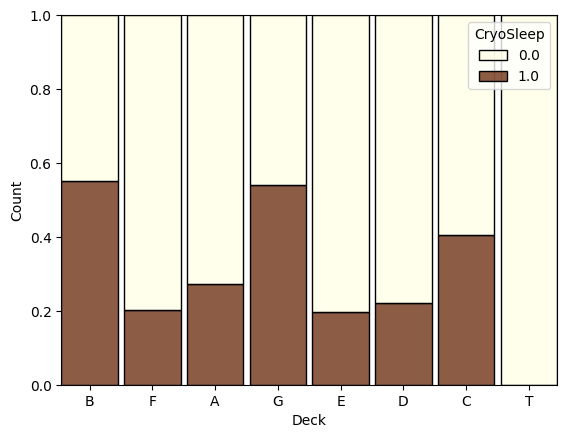

In [32]:
cat_compare(data, feature='Deck', forCol='CryoSleep')

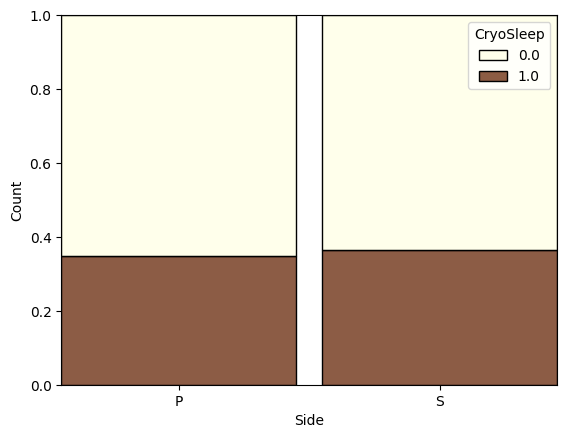

In [33]:
cat_compare(data, feature='Side', forCol='CryoSleep')

<span style="color:darkred"> Conclusion: </span>
    
    -> No CryoSleepers in T Deck
    
    -> No strong correlation between Cryo and Side

### <span style="color:blue"> VIP </span>

#### Relation between VIP and Deck/Side

In [34]:
VIP_by_Deck = pd.pivot_table(data, index='Deck', columns='VIP', values='PassengerId', aggfunc=len)
VIP_by_Deck

VIP,False,True
Deck,,
A,215.0,35.0
B,725.0,42.0
C,687.0,41.0
D,438.0,31.0
E,846.0,15.0
F,2695.0,29.0
G,2493.0,NaN
T,5.0,NaN


In [35]:
VIP_by_Side = pd.pivot_table(data, index='Side', columns='VIP', values='PassengerId', aggfunc=len)
VIP_by_Side

VIP,False,True
Side,,
P,4011,102
S,4093,91


<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's in G and T Decks
    
    -> No strong correlation between VIP and Side

#### Relation between VIP and Age

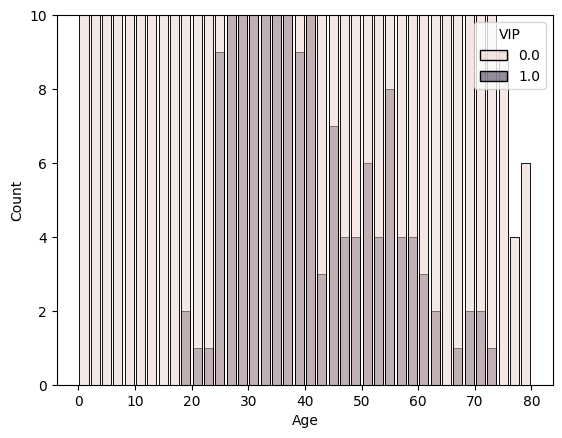

In [36]:
num_compare(data, feature='Age', forCol='VIP', binwidth=2, ylim=[0, 10])

<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's under 18 y.o.
    
    -> No VIP's above 74 y.o.

#### Relation between VIP and HomePlanet

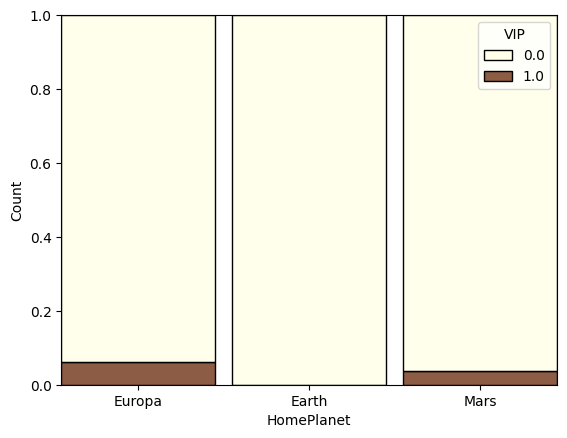

In [37]:
cat_compare(data, feature='HomePlanet', forCol='VIP')

<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's from Earth

#### Relation between VIP and Destination

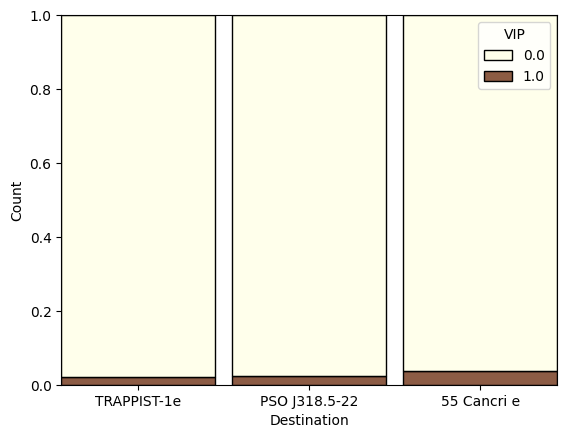

In [38]:
cat_compare(data, feature='Destination', forCol='VIP')

<span style="color:darkred"> Conclusion: </span>
    
    -> No strong correlation

#### Relation between VIP and Route

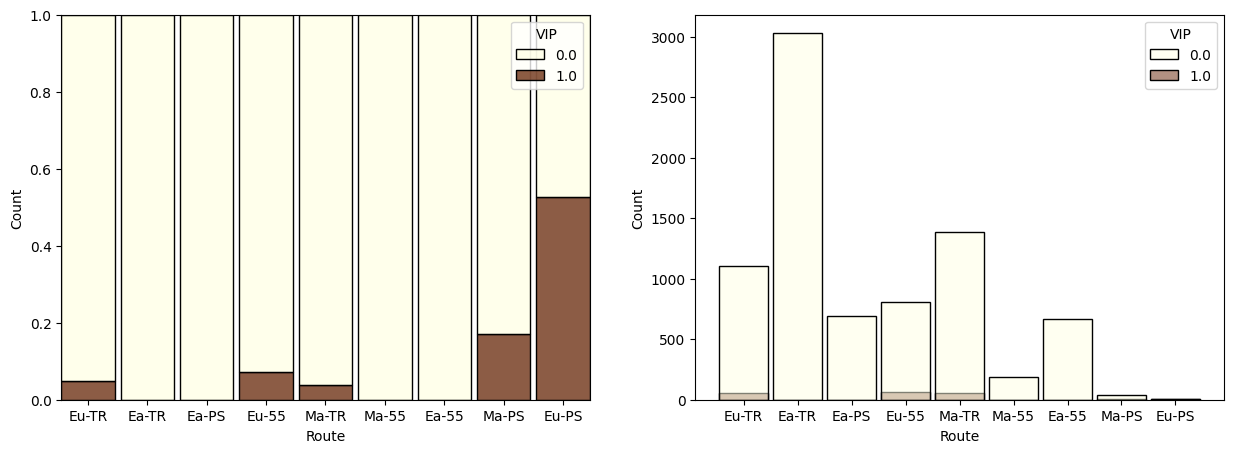

In [39]:
fig, axis = plt.subplots(1, 2)

fig.set_figwidth(15)
fig.set_figheight(5)

cat_compare(data, feature='Route', forCol='VIP', ax=axis.flatten()[0])

cat_compare(data, feature='Route', forCol='VIP', ax=axis.flatten()[1], multiple='layer')

<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's on some routes

#### Relation between being VIP or having a VIP in group and TotalSpent

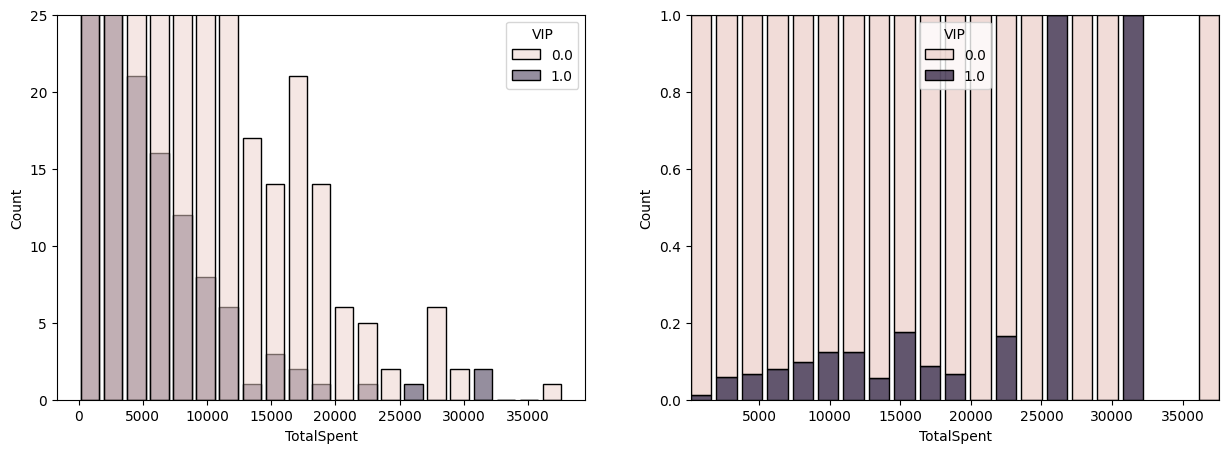

In [40]:
fig, axis = plt.subplots(1, 2)

fig.set_figwidth(15)
fig.set_figheight(5)

num_compare(data, feature='TotalSpent', forCol='VIP', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[0])

num_compare(data, feature='TotalSpent', forCol='VIP', binwidth=data.TotalSpent.max() // 20, multiple='fill', ax=axis.flatten()[1])

ax=axis.flatten()[0].set_ylim(0, 25)

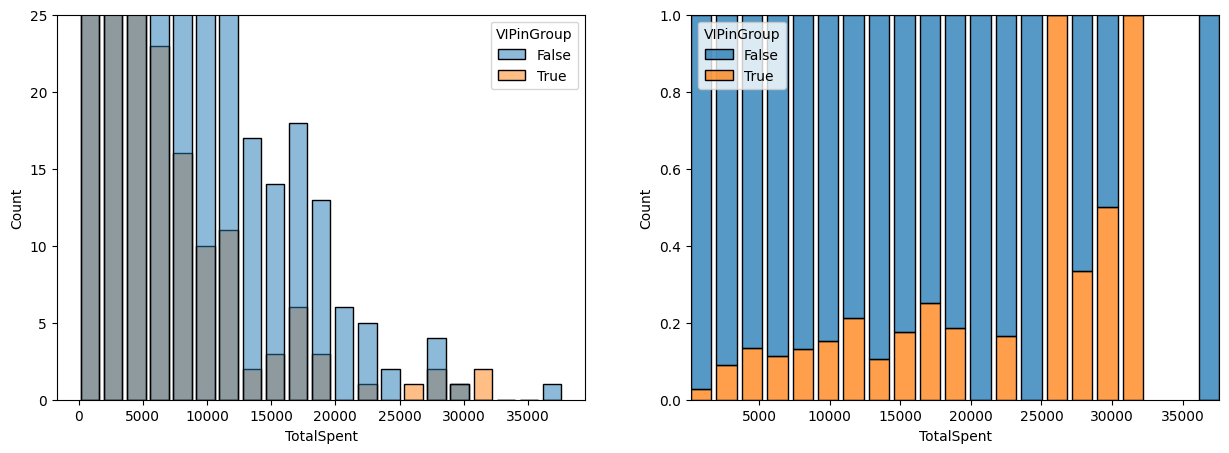

In [41]:
fig, axis = plt.subplots(1, 2)

fig.set_figwidth(15)
fig.set_figheight(5)

num_compare(data, feature='TotalSpent', forCol='VIPinGroup', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[0])

num_compare(data, feature='TotalSpent', forCol='VIPinGroup', binwidth=data.TotalSpent.max() // 20, multiple='fill', ax=axis.flatten()[1])

ax=axis.flatten()[0].set_ylim(0, 25)

<span style="color:darkred"> Conclusion: </span>
    
    -> No strong correlation  

#### Max number of VIP's in a group

In [42]:
data.groupby(['Group'])['VIP'].agg('sum').unique()

array([False, 1, 2], dtype=object)

<span style="color:darkred"> Conclusion: </span>
    
    -> Up to 2

### <span style="color:blue"> Cabin </span>

#### Do groupmates/families live in same Decks/Sides?

In [43]:
data.dropna(subset=['Deck']).groupby(['Group'])['Deck'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True     5697
False     421
Name: Deck, dtype: int64

In [44]:
data.dropna(subset=['Side']).groupby(['Group'])['Side'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True    6118
Name: Side, dtype: int64

In [45]:
data.dropna(subset=['Deck']).groupby(['Surname'])['Deck'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

False    1410
True      798
Name: Deck, dtype: int64

In [46]:
data.dropna(subset=['Side']).groupby(['Surname'])['Side'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

False    1191
True     1017
Name: Side, dtype: int64

<span style="color:darkred"> Conclusion: </span>
    
    -> Groupmates live in same Sides

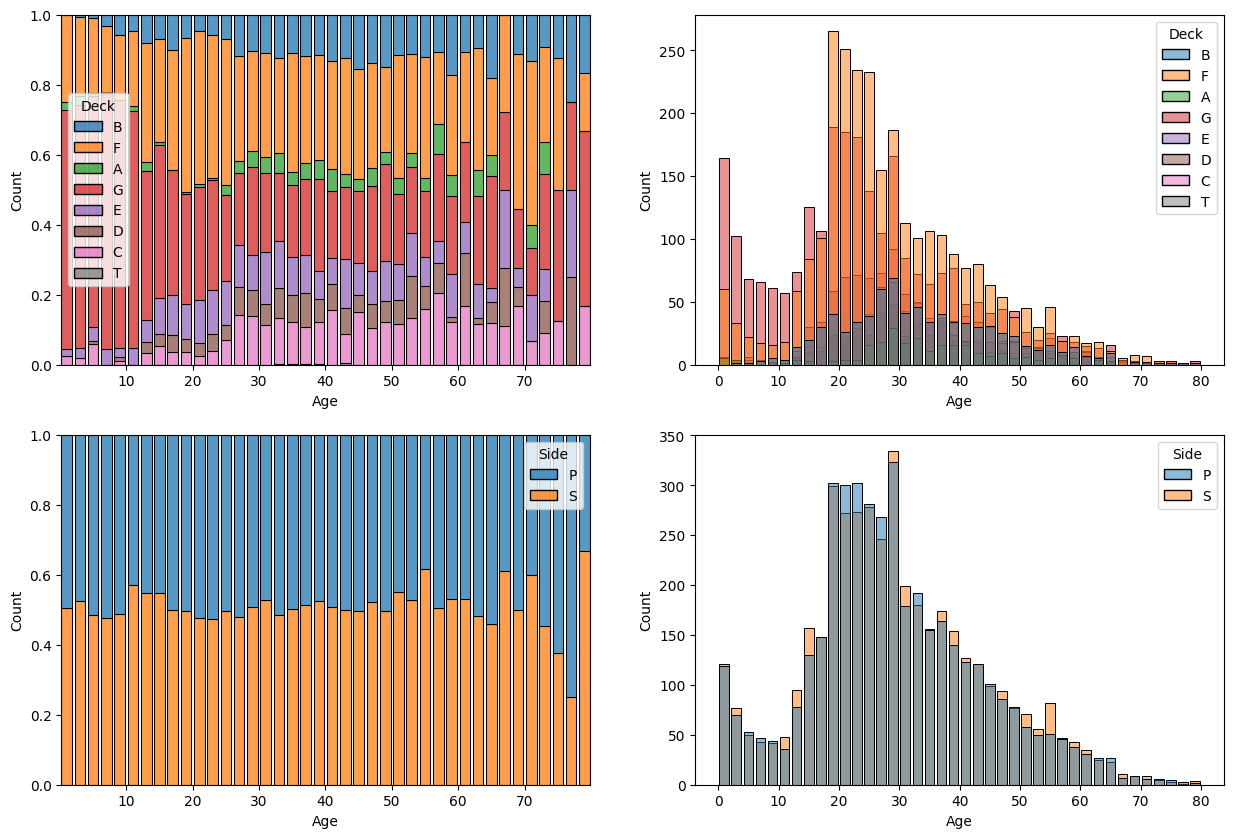

In [47]:
fig, axis = plt.subplots(2, 2)

fig.set_figwidth(15)
fig.set_figheight(10)

num_compare(data, feature='Age', forCol='Deck', binwidth=2, ax=axis.flatten()[0], multiple='fill')

num_compare(data, feature='Age', forCol='Deck', binwidth=2, ax=axis.flatten()[1])

num_compare(data, feature='Age', forCol='Side', binwidth=2, ax=axis.flatten()[2], multiple='fill')

num_compare(data, feature='Age', forCol='Side', binwidth=2, ax=axis.flatten()[3])

<span style="color:darkred"> Conclusion: </span>
    
    -> Seems like people of all ages live everywhere

### <span style="color:blue"> Spendings </span>

#### Relation between Deck/Side and spending types

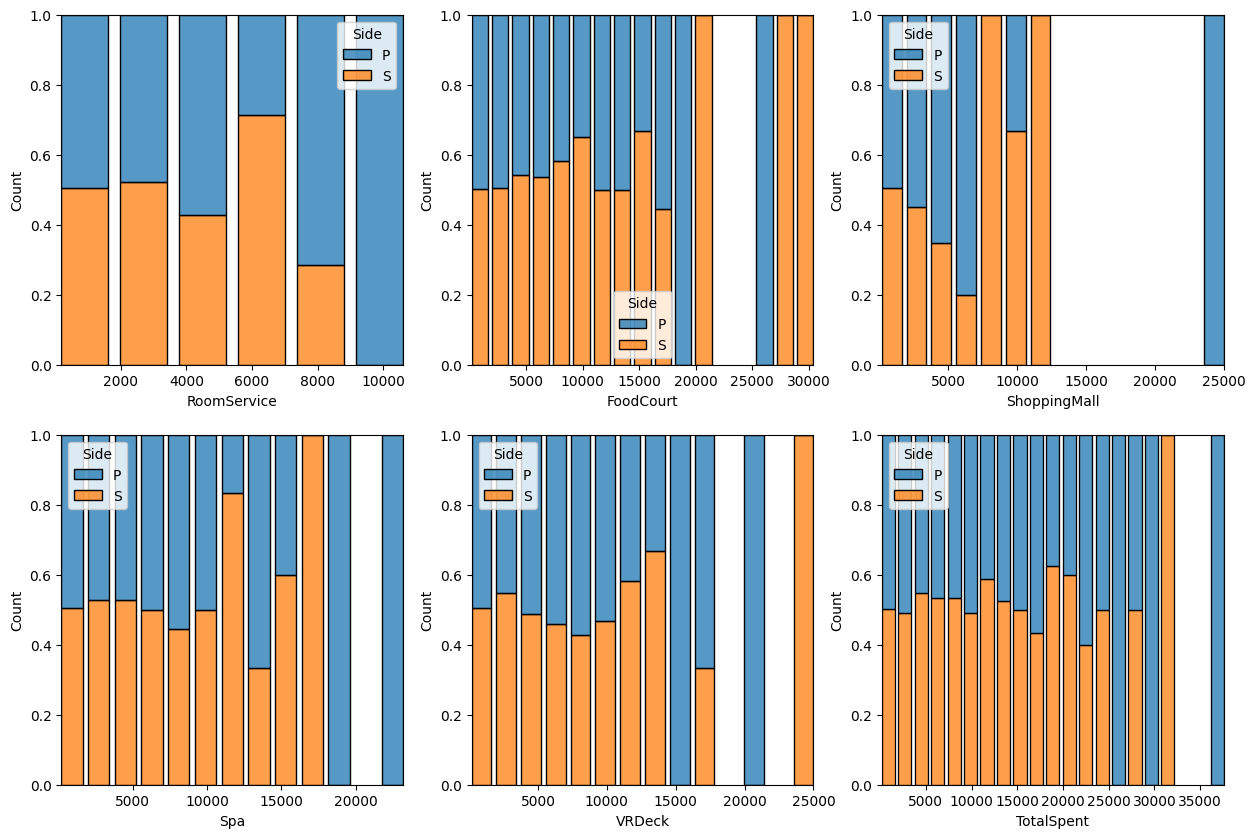

In [48]:
fig, axis = plt.subplots(2, 3)

fig.set_figwidth(15)
fig.set_figheight(10)

num_compare(data, feature='RoomService', forCol='Side', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[0], multiple='fill')

num_compare(data, feature='FoodCourt', forCol='Side', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[1], multiple='fill')

num_compare(data, feature='ShoppingMall', forCol='Side', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[2], multiple='fill')

num_compare(data, feature='Spa', forCol='Side', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[3], multiple='fill')

num_compare(data, feature='VRDeck', forCol='Side', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[4], multiple='fill')

num_compare(data, feature='TotalSpent', forCol='Side', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[5], multiple='fill')

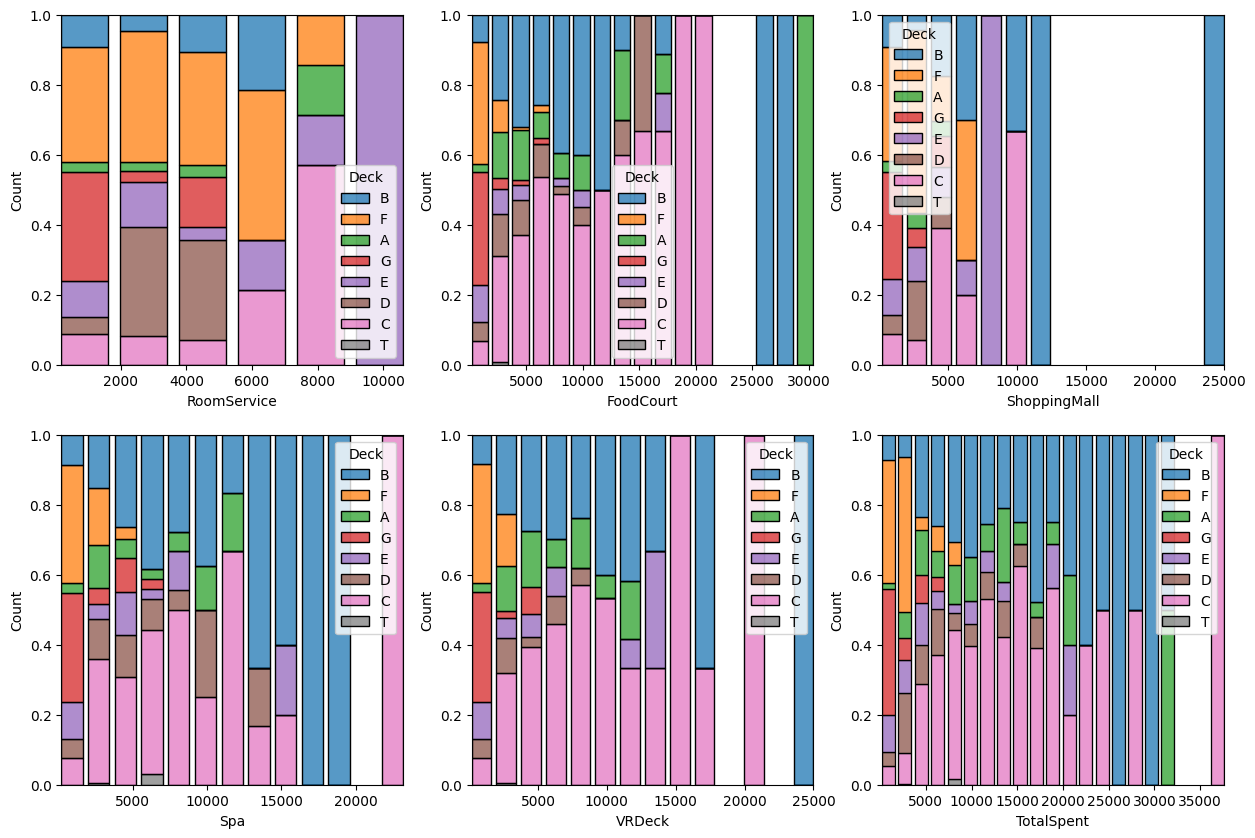

In [49]:
fig, axis = plt.subplots(2, 3)

fig.set_figwidth(15)
fig.set_figheight(10)

num_compare(data, feature='RoomService', forCol='Deck', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[0], multiple='fill')

num_compare(data, feature='FoodCourt', forCol='Deck', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[1], multiple='fill')

num_compare(data, feature='ShoppingMall', forCol='Deck', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[2], multiple='fill')

num_compare(data, feature='Spa', forCol='Deck', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[3], multiple='fill')

num_compare(data, feature='VRDeck', forCol='Deck', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[4], multiple='fill')

num_compare(data, feature='TotalSpent', forCol='Deck', binwidth=data.TotalSpent.max() // 20, ax=axis.flatten()[5], multiple='fill')

<span style="color:darkred"> Conclusion: </span>
    
    -> Feels like money are spent everywhere on everything :)

In [50]:
planets = ['Europa', 'Earth', 'Mars']
aggegation = {'RoomService': 'mean',
              'FoodCourt': 'mean',
              'ShoppingMall': 'mean',
              'Spa': 'mean',
              'VRDeck': 'mean',
              'TotalSpent': 'mean'}

m_spent = pd.DataFrame()

for planet in planets:
    m_spent[planet] = data.loc[(data.HomePlanet == planet)].agg(aggegation)

In [51]:
 m_spent

,Europa,Earth,Mars
RoomService,145.231981,136.940209,552.897272
FoodCourt,1503.212950,137.228857,54.361999
ShoppingMall,151.132820,133.872606,308.445734
Spa,848.055609,142.781701,110.221706
VRDeck,875.765998,138.132933,47.440698
TotalSpent,3552.749740,688.443307,1074.122229


<span style="color:darkred"> Conclusion: </span>
    
    -> Got mean values of spendings for each planet

## Filling in some missing values

#### <span style="color:darkorange"> HomePlanet strategy </span>

1) values based on Deck

2) values based on group

3) values based on surname

<span style="color:green"> DONE </span>

In [52]:
def HomePlanetFill(data):
    planet_by_deck = {
        'A': 'Europa',
        'B': 'Europa',
        'C': 'Europa',
        'T': 'Europa',
        'G': 'Earth'
    }
    
    for deck, planet in planet_by_deck.items():
        data.loc[(data.Deck == deck) & (data.HomePlanet.isna()), 'HomePlanet'] = data.loc[(data.Deck == deck) & (data.HomePlanet.isna()), 'HomePlanet'].fillna(value=planet)
        
    
    planet_by_group = data.dropna(subset=['HomePlanet']).groupby(['Group'])['HomePlanet'].agg(pd.Series.mode).to_dict()
    
    for row in data.loc[(data.HomePlanet.isnull())].index:
        data.loc[row, 'HomePlanet'] = planet_by_group.get(data.loc[row, 'Group'])
        
    planet_by_surname = data.dropna(subset=['HomePlanet']).groupby(['Surname'])['HomePlanet'].agg(pd.Series.mode).to_dict()
    
    for row in data.loc[(data.HomePlanet.isnull())].index:
        data.loc[row, 'HomePlanet'] = planet_by_surname.get(data.loc[row, 'Surname'], 'Earth')
        
    return data

#### <span style="color:darkorange"> VIP strategy </span>

1) values based on Age

2) values based on Deck

3) values based on HomePlanet

4) values based on Route

<span style="color:green"> DONE </span> <span style="color:orange">(mb too many VIP's) </span>

In [53]:
def VIPFill(data):
    
    # False for < 18 y.o and > 74 y.o.
    data.loc[((data.VIP.isna()) & ((data.Age > 74) | (data.Age < 18))), 'VIP'] = data.loc[((data.VIP.isna()) & ((data.Age > 74) | (data.Age < 18))), 'VIP'].fillna(value=False)
    
    # False for G and T decks
    data.loc[((data.VIP.isna()) & ((data.Deck == 'G') | (data.Deck == 'T'))), 'VIP'] = data.loc[((data.VIP.isna()) & ((data.Deck == 'G') | (data.Deck == 'T'))), 'VIP'].fillna(value=False)
    
    # False for HomePlanet == Earth
    data.loc[((data.VIP.isna()) & (data.HomePlanet == 'Earth')), 'VIP'] = data.loc[((data.VIP.isna()) & (data.HomePlanet == 'Earth')), 'VIP'].fillna(value=False)
    
    # False for Ma-55 Route
    data.loc[((data.VIP.isna()) & (data.Route == 'Ma-55')), 'VIP'] =  data.loc[((data.VIP.isna()) & (data.Route == 'Ma-55')), 'VIP'].fillna(value=False)
    
    # True for rest LET'S GOOO
    data.loc[(data.VIP.isna()), 'VIP'] = data.loc[(data.VIP.isna()), 'VIP'].fillna(value=True)
    
    #Update VIPinGroup feature:
    data['VIPinGroup'] = data.groupby(['Group'])['VIP'].transform(lambda x: True if x.sum() > 0 else False)
    
    
    return data

#### <span style="color:darkorange"> CryoSleep strategy </span>

1) values based on TotalSpent

2) values based on Age

3) values based on spending (assuming people do not spend money on a single facility

<span style="color:green"> DONE </span>

In [54]:
def CryoSleepFill(data):
    
    # TotalSpent == 0 => Cryo == True
    data.loc[((data.CryoSleep.isna()) & (data.TotalSpent == 0)), 'CryoSleep'] = data.loc[((data.CryoSleep.isna()) & (data.TotalSpent == 0)), 'CryoSleep'].fillna(value=True)
    
    # Age <= 15 or >= 70 => Cryo == True
    data.loc[((data.CryoSleep.isna()) & ((data.Age <= 15.0) | (data.Age >= 70.0))), 'CryoSleep'] = data.loc[((data.CryoSleep.isna()) & ((data.Age <= 15.0) | (data.Age >= 70.0))), 'CryoSleep'].fillna(value=True)
    
    # All nonNone spendings == 0 => CryoSleep == True
    data.loc[((data.CryoSleep.isna()) & 
              ((data.RoomService == 0) | (data.RoomService.isna())) &
              ((data.FoodCourt == 0) | (data.FoodCourt.isna())) &
              ((data.ShoppingMall == 0) | (data.ShoppingMall.isna())) &
              ((data.Spa == 0) | (data.Spa.isna())) &
              ((data.VRDeck == 0) | (data.VRDeck.isna()))
             ), 'CryoSleep'] = (
    data.loc[((data.CryoSleep.isna()) & 
              ((data.RoomService == 0) | (data.RoomService.isna())) &
              ((data.FoodCourt == 0) | (data.FoodCourt.isna())) &
              ((data.ShoppingMall == 0) | (data.ShoppingMall.isna())) &
              ((data.Spa == 0) | (data.Spa.isna())) &
              ((data.VRDeck == 0) | (data.VRDeck.isna()))
             ), 'CryoSleep'].fillna(value=True)
    )
    
    # Rest
    data.loc[(data.CryoSleep.isna()), 'CryoSleep'] = data.loc[(data.CryoSleep.isna()), 'CryoSleep'].fillna(value=False)
    
    return data

#### <span style="color:darkorange"> Spending strategy </span>

1) 0 if CryoSleep == True

2) mean by Planet

<span style="color:green"> DONE </span> <span style="color:orange">(mb adding mean spending by VIP) </span>

In [55]:
def SpendingFill(data):
    spending_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
    planets = ['Europa', 'Earth', 'Mars']
    
    aggegation = {'RoomService': 'mean',
                  'FoodCourt': 'mean',
                  'ShoppingMall': 'mean',
                  'Spa': 'mean',
                  'VRDeck': 'mean',
                  'TotalSpent': 'mean'}

    m_spent = pd.DataFrame()

    for planet in planets:
        m_spent[planet] = data.loc[(data.HomePlanet == planet)].agg(aggegation)
    
    
    for f in spending_features:
        # Cryo == True => spending = 0.0
        data.loc[((data.CryoSleep == True) & data[f].isna()), f] = data.loc[((data.CryoSleep == True) & data[f].isna()), f].fillna(value=0.0)
        
        # Filling in mean values according to HomePlanet
        for planet in planets:
        
            data.loc[((data[f].isna()) & (data.HomePlanet == planet)), f] = data.loc[((data[f].isna()) & (data.HomePlanet == planet)), f].fillna(value= m_spent[planet][f])
    
    return data

#### <span style="color:darkorange"> Cabin strategy </span>

1) values based on groupm8's (Side)

2) values based on HomePlanet

<span style="color:green"> DONE </span>

In [56]:
def CabinFill(data):
    
    # Same Sides for groups
    side_by_group = data.loc[~(data.Side.isna())].groupby(by='Group')['Side'].agg(lambda x: pd.Series.mode(x)).to_dict()
    
    for row in data.loc[data.Side.isna()].index:
        data.loc[row, 'Side'] = side_by_group.get(data.loc[row, 'Group'], 'S')
        

    deck_by_planet = {
        'Earth': ['E', 'F', 'G'],
        'Europa': ['A', 'B', 'C', 'D', 'E', 'T'],
        'Mars': ['E', 'F', 'D']
    }
    
    # Decks based on HomePlanet
    for row in data.loc[data.Deck.isna()].index:
        data.loc[row, 'Deck'] = random.choice(deck_by_planet[data.loc[row, 'HomePlanet']])
        
    return data

#### <span style="color:darkorange"> Undefined strategies </span>

1) Age

2) Destination

3) Filling Route

<span style="color:green"> DONE </span>

In [57]:
def RestFill(data):
    
    # Median for Age
    median = data.agg({'Age': 'median'})['Age']
    
    for row in data.loc[data.Age.isna()].index:
        data.loc[row, 'Age'] = median
        
    #Mode for Destination
    mode = data.agg({'Destination': 'mode'})['Destination'][0]
    for row in data.loc[data.Destination.isna()].index:
        data.loc[row, 'Destination'] = mode
        
    # Filling Route   
    data.loc[(data.Route.isna()), 'Route'] = data.HomePlanet.str.slice(start=0, stop=2).astype('string') + '-' + data.Destination.str.slice(start=0, stop=2).astype('string')
    
    return data

In [58]:
data = HomePlanetFill(data)

In [59]:
data = CryoSleepFill(data)

In [60]:
data = SpendingFill(data)

In [61]:
data = VIPFill(data)

In [62]:
data = CabinFill(data)

In [63]:
data = RestFill(data)

In [64]:
features_to_drop = ['Surname', 'Cabin', 'CabNum', 'PassengerId', 'Name']

In [65]:
data = data.drop(columns=features_to_drop)

In [66]:
data.Route = data.Route.astype('object')

In [67]:
missing = data.isnull()
for col in data.columns:
    print(f'{col}:\n\t{8693 - missing[col].value_counts()[0]} missing values')
    print('-----------------')

HomePlanet:
	0 missing values
-----------------
CryoSleep:
	0 missing values
-----------------
Destination:
	0 missing values
-----------------
Age:
	0 missing values
-----------------
VIP:
	0 missing values
-----------------
RoomService:
	0 missing values
-----------------
FoodCourt:
	0 missing values
-----------------
ShoppingMall:
	0 missing values
-----------------
Spa:
	0 missing values
-----------------
VRDeck:
	0 missing values
-----------------
Transported:
	0 missing values
-----------------
Deck:
	0 missing values
-----------------
Side:
	0 missing values
-----------------
TotalSpent:
	0 missing values
-----------------
Group:
	0 missing values
-----------------
NinGroup:
	0 missing values
-----------------
GroupSize:
	0 missing values
-----------------
VIPinGroup:
	0 missing values
-----------------
Route:
	0 missing values
-----------------


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Side          8693 non-null   object 
 13  TotalSpent    8693 non-null   float64
 14  Group         8693 non-null   object 
 15  NinGroup      8693 non-null   object 
 16  GroupSize     8693 non-null   int64  
 17  VIPinGroup    8693 non-null   bool   
 18  Route         8693 non-null 

## Preparing test dataset

In [69]:
test_df = pd.read_csv('test.csv') # 4277

In [70]:
test_df[['Deck', 'CabNum', 'Side']] = test_df.Cabin.str.split('/', expand=True)[[0, 1, 2]]

In [71]:
test_df['TotalSpent'] = test_df.RoomService + test_df.FoodCourt + test_df.ShoppingMall + test_df.Spa + test_df.VRDeck 

In [72]:
test_df[['Group', 'NinGroup']] = test_df.PassengerId.str.split('_', expand=True)[[0, 1]]

In [73]:
test_df['GroupSize'] = test_df.groupby(by='Group')['Group'].transform('count')

In [74]:
test_df['VIPinGroup'] = test_df.groupby(['Group'])['VIP'].transform(lambda x: True if x.sum() > 0 else False)

In [75]:
test_df['Surname'] = test_df.Name.str.split(' ',expand=True)[1]

In [76]:
test_df['Route'] = test_df.HomePlanet.dropna().str.slice(start=0, stop=2).astype('string') + '-' + data.Destination.dropna().str.slice(start=0, stop=2).astype('string')

In [77]:
test_df = HomePlanetFill(test_df)

In [78]:
test_df = CryoSleepFill(test_df)

In [79]:
test_df = SpendingFill(test_df)

In [80]:
test_df = VIPFill(test_df)

In [81]:
test_df = CabinFill(test_df)

In [82]:
test_df = RestFill(test_df)

In [83]:
features_to_drop = ['Surname', 'Cabin', 'CabNum', 'PassengerId', 'Name']

In [84]:
test_df = test_df.drop(columns=features_to_drop)

In [85]:
test_df.Route = test_df.Route.astype('object')

In [86]:
missing = test_df.isnull()
for col in test_df.columns:
    print(f'{col}:\n\t{4277 - missing[col].value_counts()[0]} missing values')
    print('-----------------')

HomePlanet:
	0 missing values
-----------------
CryoSleep:
	0 missing values
-----------------
Destination:
	0 missing values
-----------------
Age:
	0 missing values
-----------------
VIP:
	0 missing values
-----------------
RoomService:
	0 missing values
-----------------
FoodCourt:
	0 missing values
-----------------
ShoppingMall:
	0 missing values
-----------------
Spa:
	0 missing values
-----------------
VRDeck:
	0 missing values
-----------------
Deck:
	0 missing values
-----------------
Side:
	0 missing values
-----------------
TotalSpent:
	0 missing values
-----------------
Group:
	0 missing values
-----------------
NinGroup:
	0 missing values
-----------------
GroupSize:
	0 missing values
-----------------
VIPinGroup:
	0 missing values
-----------------
Route:
	0 missing values
-----------------


# <span style="color:purple"> Model training </span>

In [87]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [88]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent', 'GroupSize']
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'Group', 'NinGroup', 'VIPinGroup', 'Route']
target = 'Transported'

In [89]:
X = pd.concat([data[num_cols], data[cat_cols]], axis=1)
y = data[target]

In [90]:
X_train_cb, X_valid_cb, y_train_cb, y_valid_cb = train_test_split(X, y, train_size=0.8)
train_pool = Pool(X_train_cb, y_train_cb, cat_features=cat_cols)
validate_pool = Pool(X_valid_cb, y_valid_cb, cat_features=cat_cols)

In [91]:
cat_model = CatBoostClassifier(iterations=10_000,
                               random_seed=69, 
                               loss_function='Logloss', 
                               eval_metric='Accuracy:hints=skip_train~false',
                               bootstrap_type='Bayesian',
                               leaf_estimation_method='Newton',
                               verbose=1,
                               early_stopping_rounds=250)

In [92]:
grid = {'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.1, 0.2],
        'max_depth': [4, 6, 8], #максимальная глубина дерева
        'random_strength': [1, 2, 3], #степень случайности при построении дерева
        'bagging_temperature': [1, 1.5, 2, 2.5, 3]
       }

In [93]:
cb_grid_search = cat_model.grid_search(grid, train_pool, verbose=True)

0:	learn: 0.7188567	test: 0.7095615	best: 0.7095615 (0)	total: 200ms	remaining: 33m 16s
1:	learn: 0.7416861	test: 0.7598850	best: 0.7598850 (1)	total: 254ms	remaining: 21m 10s
2:	learn: 0.7398885	test: 0.7620417	best: 0.7620417 (2)	total: 300ms	remaining: 16m 41s
3:	learn: 0.7343160	test: 0.7555715	best: 0.7620417 (2)	total: 347ms	remaining: 14m 26s
4:	learn: 0.7260471	test: 0.7555715	best: 0.7620417 (2)	total: 387ms	remaining: 12m 54s
5:	learn: 0.7416861	test: 0.7620417	best: 0.7620417 (2)	total: 508ms	remaining: 14m 6s
6:	learn: 0.7436635	test: 0.7627606	best: 0.7627606 (6)	total: 551ms	remaining: 13m 6s
7:	learn: 0.7406076	test: 0.7620417	best: 0.7627606 (6)	total: 591ms	remaining: 12m 17s
8:	learn: 0.7406076	test: 0.7613228	best: 0.7627606 (6)	total: 631ms	remaining: 11m 40s
9:	learn: 0.7380910	test: 0.7570093	best: 0.7627606 (6)	total: 672ms	remaining: 11m 10s
10:	learn: 0.7454611	test: 0.7706686	best: 0.7706686 (10)	total: 718ms	remaining: 10m 51s
11:	learn: 0.7384505	test: 0.757

95:	learn: 0.7587633	test: 0.7821711	best: 0.7821711 (95)	total: 4.3s	remaining: 7m 24s
96:	learn: 0.7607406	test: 0.7821711	best: 0.7821711 (95)	total: 4.34s	remaining: 7m 23s
97:	learn: 0.7625382	test: 0.7828900	best: 0.7828900 (97)	total: 4.38s	remaining: 7m 23s
98:	learn: 0.7602013	test: 0.7836089	best: 0.7836089 (98)	total: 4.42s	remaining: 7m 22s
99:	learn: 0.7627180	test: 0.7807333	best: 0.7836089 (98)	total: 4.46s	remaining: 7m 22s
100:	learn: 0.7627180	test: 0.7807333	best: 0.7836089 (98)	total: 4.5s	remaining: 7m 21s
101:	learn: 0.7630775	test: 0.7814522	best: 0.7836089 (98)	total: 4.54s	remaining: 7m 20s
102:	learn: 0.7636168	test: 0.7821711	best: 0.7836089 (98)	total: 4.58s	remaining: 7m 20s
103:	learn: 0.7639763	test: 0.7807333	best: 0.7836089 (98)	total: 4.62s	remaining: 7m 19s
104:	learn: 0.7648751	test: 0.7836089	best: 0.7836089 (98)	total: 4.66s	remaining: 7m 19s
105:	learn: 0.7652346	test: 0.7836089	best: 0.7836089 (98)	total: 4.7s	remaining: 7m 18s
106:	learn: 0.7670

190:	learn: 0.7898616	test: 0.7943925	best: 0.7987060 (169)	total: 8.24s	remaining: 7m 3s
191:	learn: 0.7911199	test: 0.7958303	best: 0.7987060 (169)	total: 8.28s	remaining: 7m 3s
192:	learn: 0.7904009	test: 0.7958303	best: 0.7987060 (169)	total: 8.32s	remaining: 7m 2s
193:	learn: 0.7907604	test: 0.7958303	best: 0.7987060 (169)	total: 8.37s	remaining: 7m 3s
194:	learn: 0.7902211	test: 0.7943925	best: 0.7987060 (169)	total: 8.43s	remaining: 7m 3s
195:	learn: 0.7904009	test: 0.7958303	best: 0.7987060 (169)	total: 8.48s	remaining: 7m 4s
196:	learn: 0.7909401	test: 0.7951114	best: 0.7987060 (169)	total: 8.52s	remaining: 7m 3s
197:	learn: 0.7905806	test: 0.7951114	best: 0.7987060 (169)	total: 8.56s	remaining: 7m 3s
198:	learn: 0.7911199	test: 0.7951114	best: 0.7987060 (169)	total: 8.6s	remaining: 7m 3s
199:	learn: 0.7916592	test: 0.7951114	best: 0.7987060 (169)	total: 8.64s	remaining: 7m 3s
200:	learn: 0.7916592	test: 0.7958303	best: 0.7987060 (169)	total: 8.68s	remaining: 7m 3s
201:	learn:

281:	learn: 0.7954341	test: 0.7951114	best: 0.7987060 (169)	total: 12s	remaining: 6m 52s
282:	learn: 0.7957936	test: 0.7943925	best: 0.7987060 (169)	total: 12s	remaining: 6m 51s
283:	learn: 0.7950746	test: 0.7943925	best: 0.7987060 (169)	total: 12s	remaining: 6m 51s
284:	learn: 0.7956139	test: 0.7951114	best: 0.7987060 (169)	total: 12.1s	remaining: 6m 51s
285:	learn: 0.7956139	test: 0.7951114	best: 0.7987060 (169)	total: 12.1s	remaining: 6m 51s
286:	learn: 0.7961532	test: 0.7951114	best: 0.7987060 (169)	total: 12.2s	remaining: 6m 51s
287:	learn: 0.7961532	test: 0.7943925	best: 0.7987060 (169)	total: 12.2s	remaining: 6m 51s
288:	learn: 0.7959734	test: 0.7943925	best: 0.7987060 (169)	total: 12.2s	remaining: 6m 51s
289:	learn: 0.7959734	test: 0.7943925	best: 0.7987060 (169)	total: 12.3s	remaining: 6m 50s
290:	learn: 0.7961532	test: 0.7936736	best: 0.7987060 (169)	total: 12.3s	remaining: 6m 50s
291:	learn: 0.7959734	test: 0.7943925	best: 0.7987060 (169)	total: 12.3s	remaining: 6m 50s
292:	

372:	learn: 0.7981305	test: 0.7979871	best: 0.7987060 (169)	total: 15.7s	remaining: 6m 44s
373:	learn: 0.7979507	test: 0.7979871	best: 0.7987060 (169)	total: 15.7s	remaining: 6m 44s
374:	learn: 0.7977710	test: 0.7972682	best: 0.7987060 (169)	total: 15.7s	remaining: 6m 43s
375:	learn: 0.7977710	test: 0.7979871	best: 0.7987060 (169)	total: 15.8s	remaining: 6m 43s
376:	learn: 0.7977710	test: 0.7972682	best: 0.7987060 (169)	total: 15.8s	remaining: 6m 43s
377:	learn: 0.7979507	test: 0.7965492	best: 0.7987060 (169)	total: 15.9s	remaining: 6m 43s
378:	learn: 0.7981305	test: 0.7965492	best: 0.7987060 (169)	total: 15.9s	remaining: 6m 43s
379:	learn: 0.7981305	test: 0.7972682	best: 0.7987060 (169)	total: 15.9s	remaining: 6m 43s
380:	learn: 0.7981305	test: 0.7979871	best: 0.7987060 (169)	total: 16s	remaining: 6m 43s
381:	learn: 0.7981305	test: 0.7979871	best: 0.7987060 (169)	total: 16s	remaining: 6m 43s
382:	learn: 0.7979507	test: 0.7979871	best: 0.7987060 (169)	total: 16.1s	remaining: 6m 43s
383

46:	learn: 0.7594823	test: 0.7828900	best: 0.7828900 (45)	total: 2.34s	remaining: 8m 15s
47:	learn: 0.7602013	test: 0.7836089	best: 0.7836089 (47)	total: 2.38s	remaining: 8m 14s
48:	learn: 0.7627180	test: 0.7828900	best: 0.7836089 (47)	total: 2.43s	remaining: 8m 13s
49:	learn: 0.7632572	test: 0.7836089	best: 0.7836089 (47)	total: 2.47s	remaining: 8m 12s
50:	learn: 0.7627180	test: 0.7821711	best: 0.7836089 (47)	total: 2.52s	remaining: 8m 11s
51:	learn: 0.7639763	test: 0.7828900	best: 0.7836089 (47)	total: 2.56s	remaining: 8m 9s
52:	learn: 0.7655941	test: 0.7836089	best: 0.7836089 (47)	total: 2.6s	remaining: 8m 7s
53:	learn: 0.7673917	test: 0.7843278	best: 0.7843278 (53)	total: 2.64s	remaining: 8m 5s
54:	learn: 0.7690095	test: 0.7857656	best: 0.7857656 (54)	total: 2.68s	remaining: 8m 4s
55:	learn: 0.7702678	test: 0.7872035	best: 0.7872035 (55)	total: 2.72s	remaining: 8m 2s
56:	learn: 0.7713464	test: 0.7900791	best: 0.7900791 (56)	total: 2.77s	remaining: 8m 2s
57:	learn: 0.7706274	test: 0

142:	learn: 0.7936365	test: 0.7965492	best: 0.8023005 (105)	total: 6.84s	remaining: 7m 51s
143:	learn: 0.7938163	test: 0.7965492	best: 0.8023005 (105)	total: 6.89s	remaining: 7m 51s
144:	learn: 0.7945353	test: 0.7965492	best: 0.8023005 (105)	total: 6.93s	remaining: 7m 51s
145:	learn: 0.7945353	test: 0.7965492	best: 0.8023005 (105)	total: 6.98s	remaining: 7m 50s
146:	learn: 0.7947151	test: 0.7958303	best: 0.8023005 (105)	total: 7.02s	remaining: 7m 50s
147:	learn: 0.7954341	test: 0.7958303	best: 0.8023005 (105)	total: 7.07s	remaining: 7m 50s
148:	learn: 0.7952544	test: 0.7958303	best: 0.8023005 (105)	total: 7.11s	remaining: 7m 50s
149:	learn: 0.7950746	test: 0.7958303	best: 0.8023005 (105)	total: 7.16s	remaining: 7m 49s
150:	learn: 0.7947151	test: 0.7958303	best: 0.8023005 (105)	total: 7.19s	remaining: 7m 49s
151:	learn: 0.7943556	test: 0.7958303	best: 0.8023005 (105)	total: 7.24s	remaining: 7m 49s
152:	learn: 0.7943556	test: 0.7972682	best: 0.8023005 (105)	total: 7.29s	remaining: 7m 49s

235:	learn: 0.7990293	test: 0.7943925	best: 0.8023005 (105)	total: 11.2s	remaining: 7m 43s
236:	learn: 0.7988495	test: 0.7943925	best: 0.8023005 (105)	total: 11.2s	remaining: 7m 42s
237:	learn: 0.7997483	test: 0.7951114	best: 0.8023005 (105)	total: 11.3s	remaining: 7m 42s
238:	learn: 0.7995686	test: 0.7943925	best: 0.8023005 (105)	total: 11.3s	remaining: 7m 43s
239:	learn: 0.8001079	test: 0.7943925	best: 0.8023005 (105)	total: 11.4s	remaining: 7m 43s
240:	learn: 0.7999281	test: 0.7929547	best: 0.8023005 (105)	total: 11.5s	remaining: 7m 44s
241:	learn: 0.8002876	test: 0.7929547	best: 0.8023005 (105)	total: 11.5s	remaining: 7m 43s
242:	learn: 0.8004674	test: 0.7929547	best: 0.8023005 (105)	total: 11.5s	remaining: 7m 43s
243:	learn: 0.8008269	test: 0.7943925	best: 0.8023005 (105)	total: 11.6s	remaining: 7m 43s
244:	learn: 0.8006471	test: 0.7943925	best: 0.8023005 (105)	total: 11.6s	remaining: 7m 42s
245:	learn: 0.8011864	test: 0.7943925	best: 0.8023005 (105)	total: 11.7s	remaining: 7m 42s

329:	learn: 0.8060399	test: 0.7943925	best: 0.8023005 (105)	total: 15.4s	remaining: 7m 31s
330:	learn: 0.8063994	test: 0.7951114	best: 0.8023005 (105)	total: 15.5s	remaining: 7m 31s
331:	learn: 0.8063994	test: 0.7951114	best: 0.8023005 (105)	total: 15.5s	remaining: 7m 31s
332:	learn: 0.8063994	test: 0.7943925	best: 0.8023005 (105)	total: 15.5s	remaining: 7m 30s
333:	learn: 0.8062197	test: 0.7943925	best: 0.8023005 (105)	total: 15.6s	remaining: 7m 30s
334:	learn: 0.8065792	test: 0.7951114	best: 0.8023005 (105)	total: 15.6s	remaining: 7m 30s
335:	learn: 0.8071185	test: 0.7951114	best: 0.8023005 (105)	total: 15.6s	remaining: 7m 30s
336:	learn: 0.8069387	test: 0.7951114	best: 0.8023005 (105)	total: 15.8s	remaining: 7m 32s
337:	learn: 0.8069387	test: 0.7951114	best: 0.8023005 (105)	total: 15.8s	remaining: 7m 32s
338:	learn: 0.8067589	test: 0.7943925	best: 0.8023005 (105)	total: 15.9s	remaining: 7m 33s
339:	learn: 0.8067589	test: 0.7943925	best: 0.8023005 (105)	total: 16s	remaining: 7m 33s
3

65:	learn: 0.7860866	test: 0.7972682	best: 0.7987060 (60)	total: 2.87s	remaining: 7m 12s
66:	learn: 0.7860866	test: 0.7965492	best: 0.7987060 (60)	total: 2.92s	remaining: 7m 13s
67:	learn: 0.7862664	test: 0.7972682	best: 0.7987060 (60)	total: 2.97s	remaining: 7m 14s
68:	learn: 0.7869854	test: 0.7987060	best: 0.7987060 (60)	total: 3.03s	remaining: 7m 15s
69:	learn: 0.7875247	test: 0.7958303	best: 0.7987060 (60)	total: 3.08s	remaining: 7m 17s
70:	learn: 0.7878842	test: 0.7951114	best: 0.7987060 (60)	total: 3.14s	remaining: 7m 18s
71:	learn: 0.7886033	test: 0.7958303	best: 0.7987060 (60)	total: 3.18s	remaining: 7m 18s
72:	learn: 0.7887830	test: 0.7958303	best: 0.7987060 (60)	total: 3.22s	remaining: 7m 18s
73:	learn: 0.7895021	test: 0.7929547	best: 0.7987060 (60)	total: 3.26s	remaining: 7m 17s
74:	learn: 0.7895021	test: 0.7958303	best: 0.7987060 (60)	total: 3.3s	remaining: 7m 17s
75:	learn: 0.7889628	test: 0.7958303	best: 0.7987060 (60)	total: 3.35s	remaining: 7m 17s
76:	learn: 0.7898616	t

162:	learn: 0.8011864	test: 0.7965492	best: 0.7987060 (60)	total: 7.09s	remaining: 7m 7s
163:	learn: 0.8015459	test: 0.7965492	best: 0.7987060 (60)	total: 7.13s	remaining: 7m 7s
164:	learn: 0.8019054	test: 0.7965492	best: 0.7987060 (60)	total: 7.17s	remaining: 7m 7s
165:	learn: 0.8026245	test: 0.7951114	best: 0.7987060 (60)	total: 7.21s	remaining: 7m 6s
166:	learn: 0.8015459	test: 0.7951114	best: 0.7987060 (60)	total: 7.24s	remaining: 7m 6s
167:	learn: 0.8017257	test: 0.7951114	best: 0.7987060 (60)	total: 7.28s	remaining: 7m 6s
168:	learn: 0.8024447	test: 0.7943925	best: 0.7987060 (60)	total: 7.33s	remaining: 7m 6s
169:	learn: 0.8022650	test: 0.7951114	best: 0.7987060 (60)	total: 7.38s	remaining: 7m 6s
170:	learn: 0.8024447	test: 0.7951114	best: 0.7987060 (60)	total: 7.42s	remaining: 7m 6s
171:	learn: 0.8026245	test: 0.7951114	best: 0.7987060 (60)	total: 7.48s	remaining: 7m 7s
172:	learn: 0.8022650	test: 0.7958303	best: 0.7987060 (60)	total: 7.53s	remaining: 7m 7s
173:	learn: 0.8022650

259:	learn: 0.8090958	test: 0.7951114	best: 0.7987060 (60)	total: 11.2s	remaining: 6m 59s
260:	learn: 0.8089161	test: 0.7951114	best: 0.7987060 (60)	total: 11.2s	remaining: 6m 59s
261:	learn: 0.8099946	test: 0.7951114	best: 0.7987060 (60)	total: 11.3s	remaining: 6m 59s
262:	learn: 0.8101744	test: 0.7951114	best: 0.7987060 (60)	total: 11.3s	remaining: 6m 59s
263:	learn: 0.8101744	test: 0.7958303	best: 0.7987060 (60)	total: 11.4s	remaining: 6m 59s
264:	learn: 0.8107136	test: 0.7958303	best: 0.7987060 (60)	total: 11.4s	remaining: 6m 58s
265:	learn: 0.8101744	test: 0.7958303	best: 0.7987060 (60)	total: 11.4s	remaining: 6m 58s
266:	learn: 0.8101744	test: 0.7958303	best: 0.7987060 (60)	total: 11.5s	remaining: 6m 58s
267:	learn: 0.8099946	test: 0.7965492	best: 0.7987060 (60)	total: 11.5s	remaining: 6m 58s
268:	learn: 0.8101744	test: 0.7972682	best: 0.7987060 (60)	total: 11.6s	remaining: 6m 58s
269:	learn: 0.8105339	test: 0.7972682	best: 0.7987060 (60)	total: 11.6s	remaining: 6m 58s
270:	learn

40:	learn: 0.7851878	test: 0.7951114	best: 0.7965492 (32)	total: 1.72s	remaining: 6m 57s
41:	learn: 0.7853676	test: 0.7951114	best: 0.7965492 (32)	total: 1.75s	remaining: 6m 56s
42:	learn: 0.7862664	test: 0.7929547	best: 0.7965492 (32)	total: 1.79s	remaining: 6m 55s
43:	learn: 0.7877045	test: 0.7958303	best: 0.7965492 (32)	total: 1.83s	remaining: 6m 54s
44:	learn: 0.7869854	test: 0.7972682	best: 0.7972682 (44)	total: 1.87s	remaining: 6m 54s
45:	learn: 0.7869854	test: 0.7965492	best: 0.7972682 (44)	total: 1.91s	remaining: 6m 53s
46:	learn: 0.7884235	test: 0.7958303	best: 0.7972682 (44)	total: 1.95s	remaining: 6m 53s
47:	learn: 0.7880640	test: 0.7936736	best: 0.7972682 (44)	total: 1.99s	remaining: 6m 53s
48:	learn: 0.7884235	test: 0.7943925	best: 0.7972682 (44)	total: 2.03s	remaining: 6m 52s
49:	learn: 0.7889628	test: 0.7929547	best: 0.7972682 (44)	total: 2.07s	remaining: 6m 51s
50:	learn: 0.7886033	test: 0.7943925	best: 0.7972682 (44)	total: 2.11s	remaining: 6m 51s
51:	learn: 0.7891425	

135:	learn: 0.8004674	test: 0.7929547	best: 0.7972682 (44)	total: 5.49s	remaining: 6m 38s
136:	learn: 0.8004674	test: 0.7915169	best: 0.7972682 (44)	total: 5.54s	remaining: 6m 38s
137:	learn: 0.8004674	test: 0.7900791	best: 0.7972682 (44)	total: 5.58s	remaining: 6m 38s
138:	learn: 0.8002876	test: 0.7907980	best: 0.7972682 (44)	total: 5.62s	remaining: 6m 38s
139:	learn: 0.8002876	test: 0.7907980	best: 0.7972682 (44)	total: 5.63s	remaining: 6m 36s
140:	learn: 0.8002876	test: 0.7907980	best: 0.7972682 (44)	total: 5.67s	remaining: 6m 36s
141:	learn: 0.8008269	test: 0.7907980	best: 0.7972682 (44)	total: 5.71s	remaining: 6m 36s
142:	learn: 0.8008269	test: 0.7907980	best: 0.7972682 (44)	total: 5.76s	remaining: 6m 36s
143:	learn: 0.8015459	test: 0.7907980	best: 0.7972682 (44)	total: 5.81s	remaining: 6m 37s
144:	learn: 0.8013662	test: 0.7915169	best: 0.7972682 (44)	total: 5.87s	remaining: 6m 38s
145:	learn: 0.8010067	test: 0.7922358	best: 0.7972682 (44)	total: 5.92s	remaining: 6m 39s
146:	learn

228:	learn: 0.8087363	test: 0.7915169	best: 0.7972682 (44)	total: 9.28s	remaining: 6m 35s
229:	learn: 0.8096351	test: 0.7915169	best: 0.7972682 (44)	total: 9.32s	remaining: 6m 35s
230:	learn: 0.8098148	test: 0.7915169	best: 0.7972682 (44)	total: 9.36s	remaining: 6m 35s
231:	learn: 0.8096351	test: 0.7915169	best: 0.7972682 (44)	total: 9.39s	remaining: 6m 35s
232:	learn: 0.8099946	test: 0.7922358	best: 0.7972682 (44)	total: 9.43s	remaining: 6m 35s
233:	learn: 0.8099946	test: 0.7922358	best: 0.7972682 (44)	total: 9.47s	remaining: 6m 35s
234:	learn: 0.8099946	test: 0.7922358	best: 0.7972682 (44)	total: 9.52s	remaining: 6m 35s
235:	learn: 0.8103541	test: 0.7922358	best: 0.7972682 (44)	total: 9.56s	remaining: 6m 35s
236:	learn: 0.8107136	test: 0.7922358	best: 0.7972682 (44)	total: 9.6s	remaining: 6m 35s
237:	learn: 0.8101744	test: 0.7922358	best: 0.7972682 (44)	total: 9.63s	remaining: 6m 35s
238:	learn: 0.8103541	test: 0.7922358	best: 0.7972682 (44)	total: 9.67s	remaining: 6m 35s
239:	learn:

25:	learn: 0.7832105	test: 0.7900791	best: 0.7900791 (24)	total: 1.05s	remaining: 6m 43s
26:	learn: 0.7824915	test: 0.7886413	best: 0.7900791 (24)	total: 1.09s	remaining: 6m 44s
27:	learn: 0.7823117	test: 0.7886413	best: 0.7900791 (24)	total: 1.14s	remaining: 6m 46s
28:	learn: 0.7824915	test: 0.7886413	best: 0.7900791 (24)	total: 1.18s	remaining: 6m 45s
29:	learn: 0.7851878	test: 0.7893602	best: 0.7900791 (24)	total: 1.22s	remaining: 6m 45s
30:	learn: 0.7848283	test: 0.7893602	best: 0.7900791 (24)	total: 1.26s	remaining: 6m 45s
31:	learn: 0.7862664	test: 0.7886413	best: 0.7900791 (24)	total: 1.31s	remaining: 6m 48s
32:	learn: 0.7877045	test: 0.7886413	best: 0.7900791 (24)	total: 1.35s	remaining: 6m 49s
33:	learn: 0.7887830	test: 0.7900791	best: 0.7900791 (24)	total: 1.4s	remaining: 6m 50s
34:	learn: 0.7900413	test: 0.7922358	best: 0.7922358 (34)	total: 1.45s	remaining: 6m 52s
35:	learn: 0.7900413	test: 0.7907980	best: 0.7922358 (34)	total: 1.5s	remaining: 6m 55s
36:	learn: 0.7902211	te

122:	learn: 0.8078375	test: 0.7987060	best: 0.8030194 (104)	total: 5.14s	remaining: 6m 52s
123:	learn: 0.8078375	test: 0.7972682	best: 0.8030194 (104)	total: 5.18s	remaining: 6m 52s
124:	learn: 0.8074780	test: 0.7979871	best: 0.8030194 (104)	total: 5.22s	remaining: 6m 52s
125:	learn: 0.8074780	test: 0.7987060	best: 0.8030194 (104)	total: 5.26s	remaining: 6m 52s
126:	learn: 0.8080173	test: 0.7979871	best: 0.8030194 (104)	total: 5.3s	remaining: 6m 52s
127:	learn: 0.8089161	test: 0.8008627	best: 0.8030194 (104)	total: 5.34s	remaining: 6m 51s
128:	learn: 0.8083768	test: 0.7994249	best: 0.8030194 (104)	total: 5.38s	remaining: 6m 51s
129:	learn: 0.8094553	test: 0.8008627	best: 0.8030194 (104)	total: 5.42s	remaining: 6m 51s
130:	learn: 0.8089161	test: 0.8001438	best: 0.8030194 (104)	total: 5.46s	remaining: 6m 51s
131:	learn: 0.8081970	test: 0.8001438	best: 0.8030194 (104)	total: 5.5s	remaining: 6m 51s
132:	learn: 0.8083768	test: 0.7994249	best: 0.8030194 (104)	total: 5.53s	remaining: 6m 50s
1

KeyboardInterrupt: 

In [ ]:
cb_grid_search['params']

In [ ]:
#res = pd.DataFrame(cb_grid_search['cv_results'])
#res

In [ ]:
final_train_pool = Pool(X, y, cat_features=cat_cols)

In [ ]:
#cat_model.fit(final_train_pool)

In [ ]:
#kaggle_pool = Pool(test_df, cat_features=cat_cols)

In [ ]:
#sub = pd.read_csv('test.csv', usecols=['PassengerId'])
#sub['Transported'] = cat_model.predict(kaggle_pool)
#sub.to_csv('./my_submission.csv', index=False)